In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(category=Warning, action="ignore")

In [3]:
data_frame = pd.read_csv("../PROJECTS/FIFA/players_19.csv")
data_frame_copy = data_frame

In [5]:
data_frame.head(2)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",94,94,77000000.0,400000.0,33,...,54+4,54+4,54+4,61+4,20+4,https://cdn.sofifa.net/players/020/801/19_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"CF, RW, ST",94,94,110500000.0,575000.0,31,...,48+7,48+7,48+7,59+7,19+7,https://cdn.sofifa.net/players/158/023/19_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png


# Bar plots
* Combine categorical and  numerical variables pairs category-value.
* Works on  aggragated DataFrame. From original DataFrame we use aggregating method for example groupby. Then new DataFrame contains group and corresponding aggregated statistics for each group in attribute.


In [8]:
leagues = list(data_frame["league_name"].value_counts().head(5).index)

In [10]:
leagues

['Argentina Primera División',
 'English League Championship',
 'English Premier League',
 'English League One',
 'USA Major League Soccer']

In [12]:
data_frame.set_index("league_name", inplace=True)

In [14]:
data_frame = data_frame.loc[ leagues , ["overall"]]

In [16]:
data_frame.reset_index(drop = False, inplace = True)

In [18]:
data_frame.head(2)

,league_name,overall
0,Argentina Primera División,80
1,Argentina Primera División,79


In [20]:
aggregated = data_frame.groupby("league_name")["overall"].agg([np.mean, np.max, np.min]).reset_index()

In [22]:
aggregated

,league_name,mean,max,min
0,Argentina Primera División,66.881543,80,51
1,English League Championship,67.186370,81,51
2,English League One,61.770186,74,47
3,English Premier League,73.457576,91,53
4,USA Major League Soccer,66.527070,85,47


array([<Axes: title={'center': 'mean'}, xlabel='league_name'>,
       <Axes: title={'center': 'min'}, xlabel='league_name'>,
       <Axes: title={'center': 'max'}, xlabel='league_name'>],
      dtype=object)

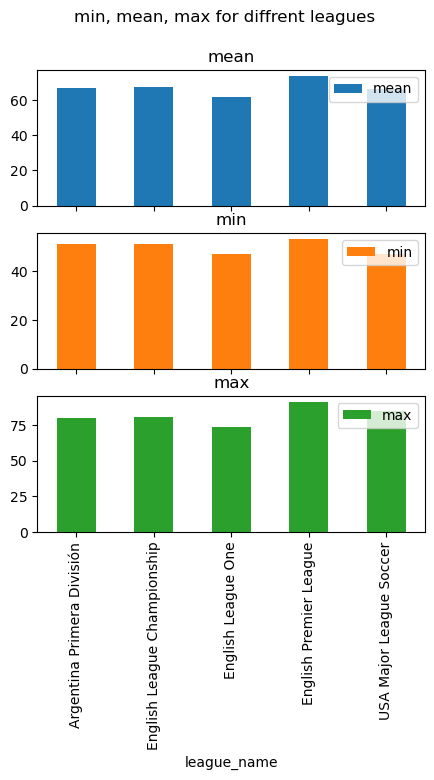

In [24]:
aggregated.plot(
    kind = "bar",
    figsize=(5, 6),
    title = "min, mean, max for diffrent leagues",
    x = "league_name",
    y = ["mean", "min", "max"],
    rot = 90,
    subplots = True
)

# Scatter plot
* good for showing relationships between two numerical variables
* does not aggregate values – rather plot each point in dataset
* does not support subplots in one invoke
* could customize size and color for points


In [26]:
numeric_data = data_frame_copy[["age", "overall", "weight_kg", "height_cm"]].reset_index(drop = True).sample(n=500, random_state=32)

In [29]:
numeric_data.head(4)

,age,overall,weight_kg,height_cm
3403,29,72,70,171
10609,22,65,70,180
11312,23,64,78,183
3501,25,72,70,180


<Axes: title={'center': 'relationship between weight and height'}, xlabel='weight_kg', ylabel='height_cm'>

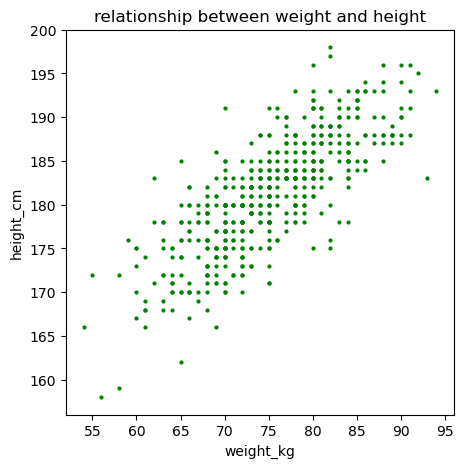

In [31]:
numeric_data.plot(
    kind = "scatter",
    x = "weight_kg",
    y = "height_cm",
    figsize = (5,5),
    title = "relationship between weight and height",
    s = 4,
    c = "green"
)

# Histogram
* good for showing distribution for column – Series
* Does not aggregate dataframe
* Could be used in 3 ways : with Series, with DataFrame subplots or with DataFrame alpha
* Could be used only for numerical values 

In [34]:
hist_data = data_frame_copy.loc[ : , ["age", "value_eur", "height_cm"]].sample(n = 100, random_state = 32).reset_index(drop = True)

In [36]:
hist_data.head(15)

,age,value_eur,height_cm
0,29,2400000.0,171
1,22,825000.0,180
2,23,500000.0,183
3,25,4000000.0,180
4,25,5000000.0,176
5,26,800000.0,178
6,19,110000.0,191
7,29,1300000.0,180
8,20,1200000.0,186
9,18,140000.0,171


<Axes: ylabel='Frequency'>

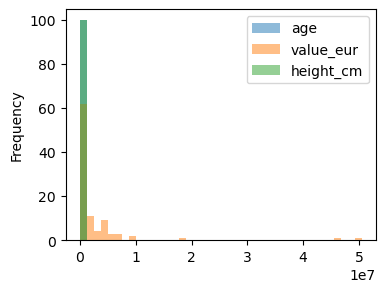

In [38]:
hist_data.plot(
    kind = "hist",
    bins = 40,
    figsize = (4,3),
    alpha = 0.5
)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

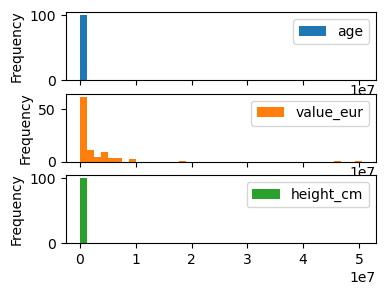

In [40]:
hist_data.plot(
    kind = "hist",
    bins = 40,
    figsize = (4,3),
    alpha = 1,
    subplots = True
)

<Axes: title={'center': 'age distribution'}, ylabel='Frequency'>

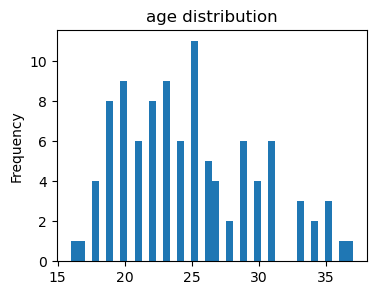

In [41]:
hist_data["age"].plot(
    kind = "hist",
    bins = 40,
    figsize = (4,3),
    alpha = 1,
    subplots = False,
    title = "age distribution"
)

# Line plot
* Good for time series - datetype
* DataFrame needs to be sorted by date – ascending


In [45]:
versions =  ["19", "20", "21", "22"]
data_frames = []
for version in versions: 
    data_frames.append(pd.read_csv(f"../PROJECTS/FIFA/players_{version}.csv"))

In [46]:
for df, year in zip(data_frames, versions):
    df["year"] = 2000 + int(year)

In [47]:
data_frame = pd.concat(objs = [df[["year", "short_name", "overall", "potential", "age"]] for df in data_frames], axis = 0)

In [51]:
data_frame = data_frame.drop_duplicates(subset=["year", "short_name"]).set_index("short_name")

In [53]:
data_frame.loc[ ["Cristiano Ronaldo", "L. Messi"] , :]

,year,overall,potential,age
short_name,,,,
Cristiano Ronaldo,2019,94,94,33
Cristiano Ronaldo,2020,93,93,34
Cristiano Ronaldo,2021,92,92,35
Cristiano Ronaldo,2022,91,91,36
L. Messi,2019,94,94,31
L. Messi,2020,94,94,32
L. Messi,2021,93,93,33
L. Messi,2022,93,93,34


In [55]:
data_frame.reset_index(drop = False, inplace = True)

In [57]:
data_frame

,short_name,year,overall,potential,age
0,Cristiano Ronaldo,2019,94,94,33
1,L. Messi,2019,94,94,31
2,Neymar,2019,92,93,26
3,Sergio Ramos,2019,91,91,32
4,L. Suárez,2019,91,91,31
...,...,...,...,...,...
70694,R. Gallagher,2022,47,61,20
70695,Song Defu,2022,47,52,22
70696,N. Logue,2022,47,55,21
70697,L. Rudden,2022,47,60,19


In [59]:
players_year_count = data_frame.groupby("short_name").count().reset_index(drop = False)

In [61]:
players_year_count.columns

Index(['short_name', 'year', 'overall', 'potential', 'age'], dtype='object')

In [63]:
players_name_allfifas = players_year_count[players_year_count["year"] == 4]["short_name"].values

In [65]:
players_allfifas = data_frame.set_index("short_name").loc[players_name_allfifas, : ]

In [69]:
line_plot_data = pd.DataFrame(players_allfifas).reset_index(drop = False)

In [115]:
line_plot_data = line_plot_data.groupby("year")[["overall", "potential", "age"]].mean()

In [131]:
line_plot_data.sort_index()

,overall,potential,age
year,,,
2019,68.634769,73.733325,24.912519
2020,69.630538,73.817944,25.818940
2021,69.737307,73.088975,26.553758
2022,69.958437,72.366725,27.480712


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>], dtype=object)

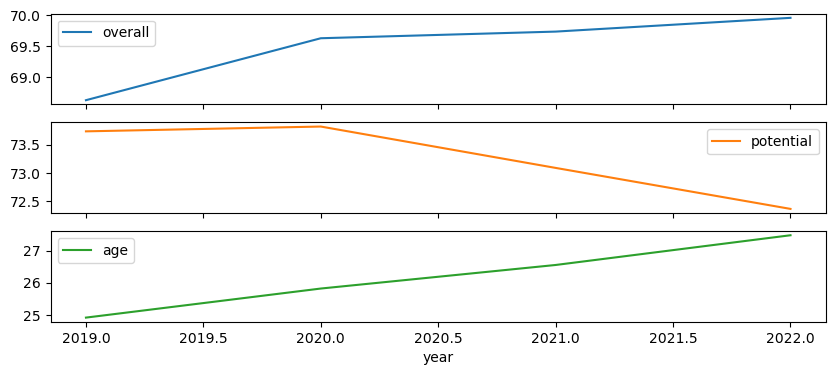

In [129]:
line_plot_data.plot(
    kind = "line",
    subplots = True,
    y = ["overall", "potential", "age"],
    figsize = (10, 4)
)


# Pie plot
* use to visualize category variable and each value controbution in this variable
* for subplots requires common index
* Requires index – that will be ised as labels in pie chart

In [146]:
np.array(data_frame_copy.columns) 

array(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_level', 'club_position', 'club_jersey_number',
       'club_loaned_from', 'club_joined', 'club_contract_valid_until',
       'nationality_id', 'nationality_name', 'nation_team_id',
       'nation_position', 'nation_jersey_number', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation',
       'work_rate', 'body_type', 'real_face', 'release_clause_eur',
       'player_tags', 'player_traits', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration',
    

In [226]:
data_frame_positions = data_frame_copy.reset_index(drop = True)
data_frame_positions = data_frame_positions.loc[: , ["player_positions"]]["player_positions"].str.split(pat = ", ", expand = True).loc[: , [0]]
data_frame_positions = data_frame_positions.rename(columns = {0 : "position"})

In [228]:
data_frame_positions

,position
0,ST
1,CF
2,LW
3,CB
4,ST
...,...
18080,CM
18081,GK
18082,CM
18083,RB


In [236]:
type(data_frame_positions["position"].value_counts())

pandas.core.series.Series

<Axes: title={'center': 'position distribution'}, ylabel='count'>

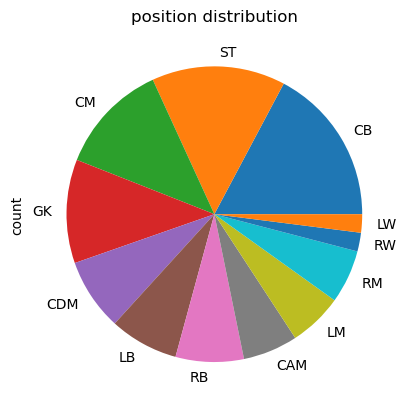

In [248]:
data_frame_positions["position"].value_counts()[:-3].plot(
    kind = "pie",
    title = "position distribution"
)

In [500]:
pie_data = data_frame_copy.loc[: , [ 'wage_eur', 'value_eur']].reset_index(drop = False)

In [502]:
pie_data = pie_data.groupby("league_name")[["wage_eur","value_eur"]].sum()

In [504]:
pie_data["wage_eur"] = pie_data["wage_eur"] / 1000000
pie_data["value_eur"] = pie_data["value_eur"] / 1000000

In [506]:
pie_data = pie_data.rename(columns = {"wage_eur" : "wage_eur_mln", "value_eur" : "value_eur_mln"})

In [508]:
pie_data = pie_data.sort_values(by=["value_eur_mln", "wage_eur_mln"], ascending=[False, False])

In [510]:
top5 = pie_data.iloc[ :5 , :]

In [512]:
others = pd.DataFrame(pie_data.iloc[ 5: , :][["wage_eur_mln", "value_eur_mln"]].sum()).transpose()

In [514]:
pie_data = pd.concat(objs = [others, top5], axis = 0).reset_index(drop = False).rename(columns={"index" : "Leagues"})

In [554]:
# pd.DataFrame.replace?

In [526]:
pie_data = pie_data.replace(0, "Others")

In [532]:
pie_data.set_index("Leagues", inplace = True)

In [536]:
pie_data

,wage_eur_mln,value_eur_mln
Leagues,,
Others,75.4530,19543.932
English Premier League,35.6280,6397.005
Spain Primera Division,20.3200,5774.835
Italian Serie A,18.7365,4588.410
German 1. Bundesliga,13.6840,3981.610
French Ligue 1,11.7525,3058.795


array([<Axes: ylabel='wage_eur_mln'>, <Axes: ylabel='value_eur_mln'>],
      dtype=object)

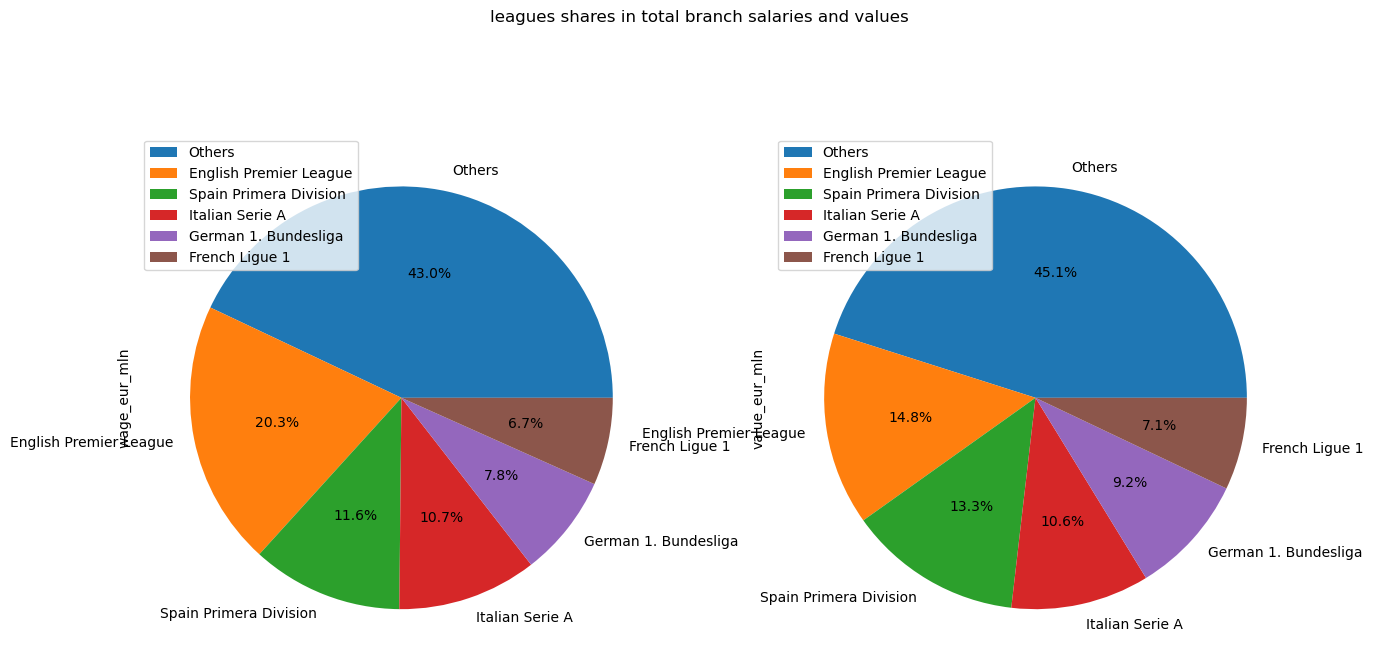

In [552]:
pie_data.plot(
    kind = "pie",
    subplots = True,
    figsize = (15,8),
    autopct='%1.1f%%',
    title = "leagues shares in total branch salaries and values"
)